In [5]:
#φορτώνω τις κατάλληλες βιβλιοθήκες
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.io import loadmat #τελικά δεν χρειάστηκε
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [6]:
df=pd.read_excel("LS_house_prices/housedata.xls",sheet_name=0) #φορτώνουμε τα δεδομένα μας από το excel 
col=df.columns #θέτουμε την μεταβλητή μας col απλά για να δούμε τα ονόματα των στηλών
print(col) #τα εκτυπώνουμε

y_raw=df['selling price in 1000 dollars'].astype(str) #φορτώνουμε τα δεδομένα μας του target y που θελουμε να προβλέψουμε έτσι όπως είναι και τα κάνουμε όλα σε string μορφή
y_raw=y_raw.str.replace(';','',regex=True) #τώρα θέτουμε όπου είναι τα ερωτηματικά το κενό δηλαδή τίποτα και το regex είναι για να 
y_raw=y_raw.astype(float).to_numpy()

Q1=np.quantile(y_raw,0.25) #εδώ βρίσκουμε το το q1 μέσω της numpy
Q3=np.quantile(y_raw,0.75) #αντίστοιχα το q3
IQR=Q3-Q1 #υπολογισμός IQR
lower=Q1-1.5*IQR #Βρίσκουμε το κάτω άκρο
upper=Q3+1.5*IQR #αντίστοιχα το άνω άκρο

keep=[] #στη keep λίστα θα κρατήσουμε τις γραμμές γνωρίσματα και y που είναι εντός των ορίων (δηλαδή να μην είναι outliers)
for i in y_raw: #τρέχουμε μία λούπα για κάθε τιμή σπιτιού δηλαδή το y 
    if i>=lower and i<=upper: #βάζουμε τον περιορισμό
        keep.append(True) #βάζουμε True στην λίστα από τα σπίτια που δεν είναι outliers
    else: #αλλιώς
        keep.append(False) 

df_clean=df[keep].copy() #από εδώ και πέρα θα λειτουργούμε με το df_clean και για όλα τα παρακάτω ερωτήματα
print(df_clean.shape[0]) #εδώ απλά θέλω να δω τον αριμθό των δεδομένων μετά το data cleaning

Index(['location ', '#bedrooms', '#bathrooms',
       'house area in 1000 square feet', '1 if condo, 0 otherwise ',
       'selling price in 1000 dollars'],
      dtype='object')
749


In [7]:
x1=df_clean['house area in 1000 square feet'].to_numpy().reshape(-1,1) #φορτώνουμε το x1 διάνυσμα που είναι τα τετραγωνικά του σπιτιού μετατρέποντας τα σε διανύσματα με το .to_numpy (απλά έτσι το έχω συνηθίσει γίνεται και με DataFrame)
x2=df_clean['#bedrooms'].to_numpy().reshape(-1,1) #αντίστοιχα το x2 θα είναι ο αριθμός των δωματίων του σπιτιού και πάλι τα μετατρέπουμε σε διάνυσμα και
X=np.concatenate([x1,x2],axis=1) #το τελικό X που θα χρησιμοποιήσουμε θα είναι η ένωση αυτών των δύο διανυσμάτων (δίπλα-δίπλα η ένωση)

y_clean=df_clean['selling price in 1000 dollars'].astype(str) #εδώ έχουμε τώρα τα καθαρά y χωρίς outliers και τα μετατρέπουμε όλα σε string μορφή
y_clean=y_clean.str.replace(';','',regex=False) #αντικαθιστούμε όπου έχει εερωτηματικό με το κενό
y_clean=y_clean.astype(float).to_numpy() #y_clean έχει διάσταση (749,) και το μετατρέπουμε σε διάνυσμα

X_train,X_test,y_train,y_test=train_test_split(X,y_clean,train_size=695,random_state=42) #εδώ χωρίζουμε το dataset σε train/test split με το αριθμό train size που ζητάει η άσκηση

model=LinearRegression() #εδώ δημιουργούμε το μοντέλο μας της γραμμικής Παλινδρόμησης
model.fit(X_train,y_train) #εδώ προπονούμε το μοντέλο μας με το X_train dataset

y_train_hat=model.predict(X_train) #εδώ τα βάζω ξεχωριστά τα predict του train και του test για να φανούν ξεχωριστά στα scatterplot τα predict 
y_test_hat=model.predict(X_test) #ομοίως 

/var/folders/87/52d3yb950pdg3w9hzlmhq1c80000gn/T/ipykernel_64237/3123051552.py:4: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r--" (-> color='r'). The keyword argument will take precedence.
  plt.plot([y_clean.min(),y_clean.max()],[y_clean.min(),y_clean.max()],'r--',lw=2, color='purple',label='Perfect Prediction (y=x)') #εδώ δημιουργούμε την y=x γραμμή όπου είναι οι τέλειες προβλέψεις με χρωμά μωβ και ετικέτα perfect prediction και μέγεθος της γραμμής 2


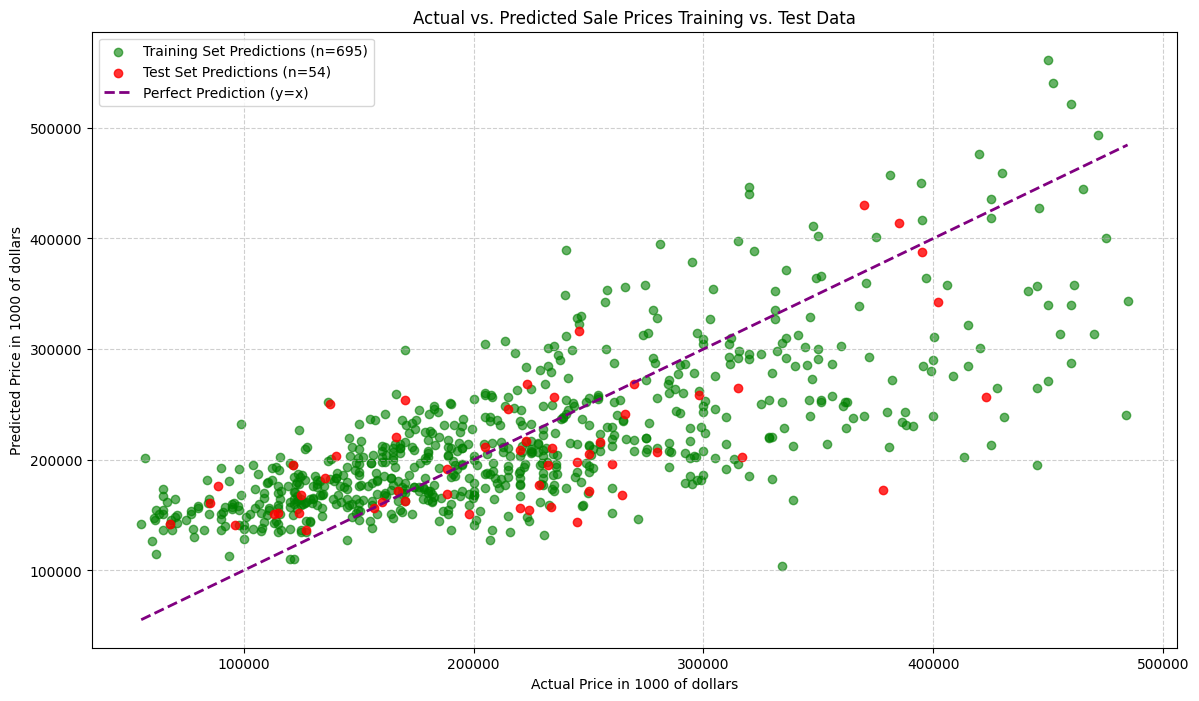

In [8]:
plt.figure(figsize=(14,8)) #φτιάχνουμε το μέγεθος της εικόνας να είναι λίγο ορθογωνοποιημένο
plt.scatter(y_train,y_train_hat,alpha=0.6,color='green',label=f'Training Set Predictions (n={len(y_train)})') #εδώ δημιουργούμε το scatterplot με ένταση στις κουκκίδες με 0.6, χρώμα πράσινο
plt.scatter(y_test,y_test_hat,alpha=0.8,color='red',label=f'Test Set Predictions (n={len(y_test)})') 
plt.plot([y_clean.min(),y_clean.max()],[y_clean.min(),y_clean.max()],'r--',lw=2, color='purple',label='Perfect Prediction (y=x)') #εδώ δημιουργούμε την y=x γραμμή όπου είναι οι τέλειες προβλέψεις με χρωμά μωβ και ετικέτα perfect prediction και μέγεθος της γραμμής 2
plt.title('Actual vs. Predicted Sale Prices Training vs. Test Data') #δίνουμε ένα τίτλο στο plot
plt.xlabel('Actual Price in 1000 of dollars') #το όνομα που θα δώσουμε στο x-άξονα
plt.ylabel('Predicted Price in 1000 of dollars') #αντίστοιχα στο y-άξονα
plt.legend() #για να εμφανίσει τις ετικέτες πάνω στο plot
plt.grid(True,linestyle='--',alpha=0.6) #φτιαξαμε τις γραμμές πάνω στο plot 
plt.show() #αυτή η εντολή είναι για να μας βγάλει το scatterplot

In [9]:
x1_raw=np.array([[846],[1324],[1150],[3037],[3984]]) #το x1 που μας ζητάει το Εμβαδόν σε square feet
x2_new=np.array([[1],[2],[3],[4],[5]]) #x2 που μας ζητάει ταΥπνοδωμάτια
y_actual_raw=np.array([[115000],[234500],[198000],[528000],[572500]]) #δημιουργούμε το διάνυσμα y που μας ζητάει η άσκηση
x1_new=x1_raw/1000 #εδώ διορθώνουμε την κλίμακα

X_new=np.concatenate((x1_new,x2_new),axis=1) #ενώνουμε πάλι τα δύο διανύσματα
y_prediction_new=model.predict(X_new) # Πρόβλεψη σε χιλιάδες δολλάρια

RMSE_train=np.sqrt(mean_squared_error(y_train,y_train_hat)) #βρίσκουμε το RMSE για το train set
RMSE_test=np.sqrt(mean_squared_error(y_test,y_test_hat)) #εδώ για το test set

print("RMSE (Training):",RMSE_train) #τα εκτυπώνουμε
print("RMSE (Test): ",RMSE_test)

if abs(RMSE_train-RMSE_test)/RMSE_train<0.05: #εδώ υπολογίζουμε την απόλυτη τιμή/το rmse του train και αν είναι μικρότερο του 0.05 τότε το μοντέλο θα έχει καλή ικανότητα γενίκευσης
    print("Συμπέρασμα: Τα RMSE είναι πολύ κοντά. Το μοντέλο έχει λογική ικανότητα γενίκευσης.")
else:
    print("nΣυμπέρασμα: Τα RMSE διαφέρουν σημαντικά. Υπάρχει πιθανότητα overfitting/underfitting.")

RMSE (Training): 63777.76245144159
RMSE (Test):  64965.443905001346
Συμπέρασμα: Τα RMSE είναι πολύ κοντά. Το μοντέλο έχει λογική ικανότητα γενίκευσης.


In [10]:
x1=df_clean['house area in 1000 square feet'].to_numpy()
x2=df_clean['#bedrooms'].to_numpy()
x3=df_clean['1 if condo, 0 otherwise '].to_numpy() #φορτώνουμε και αυτά τα δεδομένα 
x4=df_clean['location '].to_numpy() #φορτώνουμε και το location
print(df.columns)

df_clean['f1']=1 #εδώ δημιουργούμε τις συναρτήσεις που μας ζήτησε η άσκηση
df_clean['f2']=df['house area in 1000 square feet'] 
df_clean['f3']=np.maximum(df['house area in 1000 square feet']-1.5,0) #από την numpy επιλέγουμε το maximum
df_clean['f4']=df['#bedrooms']
df_clean['f5']=df['1 if condo, 0 otherwise ']

#το one-hot-encoding για να μην έχουμε θέμα και επηρεάζεται η γραμμική μας παλινδρόμηση από το ποιος αριθμός είναι μεγαλύτερος ή μικρότερος
df_clean['f6']=0 #αρχικά δημιουργούμε μία νέα στήλη f6 όπου όλες οι τιμές είναι 0
df_clean['f7']=0 #το ίδιο και εδω f7
df_clean['f8']=0 #και εδώ f8

#εφαρμοφή του one-hot-encoding
df_clean.loc[df_clean['location ']==2,'f6']=1 #χρησιμοποιούμε την .loc της pandas για να επιλέξουμε όλες τις γραμμές όπου η τιμή είναι ίση με 2 και γι' αυτές τις τιμές ορίζουμε στην στήλη στη συγκεκριμένη γραμμή το 1
df_clean.loc[df_clean['location ']==3,'f7']=1 #ομοίως αλλά στην στήλη f7 αν βρούμε στο location τον αριθμό 3
df_clean.loc[df_clean['location ']==4,'f8']=1 #ομοίως αλλά στην στήλη f8 αν βρούμε στο location τον αριθμό 4

Index(['location ', '#bedrooms', '#bathrooms',
       'house area in 1000 square feet', '1 if condo, 0 otherwise ',
       'selling price in 1000 dollars'],
      dtype='object')


In [11]:
X_features=['f2','f3','f4','f5','f6','f7','f8'] #θέτω σε μία λίστα τις στ
X_new=df_clean[X_features].to_numpy()
y_clean_data=df_clean['selling price in 1000 dollars'].astype(str) #ομοίως ένα μικρό data cleaning όσο αφορά τα ερωτηματικά
y_clean_data=y_clean_data.str.replace(';','',regex=False) #εδώ το κάνουμε
y=y_clean_data.astype(float).to_numpy() #τώρα έχουμε αριθμητικές τιμές και διάνυσμα

X_train_new,X_test_new,y_train_new,y_test_new=train_test_split(X_new,y,train_size=695,random_state=42) #κάνουμε πάλι το train/test split

model_new=LinearRegression() #θέτουμε το καινούργιο μας μοντέλο
model_new.fit(X_new,y) #το προπονούμε στα νέα γνωρίσματα-συναρτήσεις που έχουμε ορίσει εμείς
pred_new=model_new.predict(X_new) #προβλέπουμε

theta1=model_new.intercept_ #θέλω να μου εκτυπώσει τον σταθερό όρο
print(theta1)

theta_others=model_new.coef_ #τα υπόλοιπα θ που προέκυψαν από την προπόνηση
print(theta_others)

145091.33056141934
[ 6.13527133e+01  6.13527133e+01 -1.26908405e+04 -2.68303428e+04
 -8.14269986e+04 -8.50945315e+04 -1.46694604e+04]


In [13]:
from sklearn.model_selection import KFold #φορτώνουμε την κλάση KFolds η οποία οργανώνει τα δεδομένα μας για το cross-validation (δημιουργεί τουσ δείκτες για τα folds)
from sklearn.metrics import r2_score #δεν κάνω ακόμα την μέθοδο cross_val_score για να το δω πρώτα χειροκίνητα
from sklearn.model_selection import cross_val_score #πάμε να το κάνουμε έτοιμα τώρα από την scikit που έχει έτοιμη εντολή

In [14]:
N_FOLDS=5 #ορίζουμε πόσα fold θα έχουμε
r2_scores=cross_val_score(estimator=model,X=X,y=y_clean,scoring='r2',cv=N_FOLDS)
#στο estimator βάζουμε αυτό που θέλουμε να αξιολογήσουμε δηλαδή το μοντέλο model_cv την γραμμική πολλαπλή παλινδρόμηση
#βάζουμε τα πλήρη δεδομένα x1 και x2 εδώ
#βάζουμε και τα y από το data cleaning
#για scoring διαλέγουμε όποια μετρική θέλουμε, εμείς επιλέγουμε τώρα την R^2
#cv είναι ο αριθμός των fold
r2_scores_all=cross_val_score(estimator=model_new,X=X_new,y=y,scoring='r2',cv=N_FOLDS) #αντίστοιχη διαδικασία γαι το συνολικό μοντέλο με όλα τα γνωρίσματα
print("R^2 Scores ανά Fold για το μοντέλο με μόνο δυο χαρακτηριστικά:",r2_scores)
print("Μέσος Όρος R^2 για model με μόνο δύο χαρακτηριστικά:",np.mean(r2_scores))
print("R^2 Scores ανά Fold για το συνολικό μοντέλο",r2_scores_all)
print("Ο μέσος όρος R^2 για το συνολικό μοντέλο",np.mean(r2_scores_all))

R^2 Scores ανά Fold για το μοντέλο με μόνο δυο χαρακτηριστικά: [0.61965533 0.5827126  0.35304374 0.20186823 0.55341334]
Μέσος Όρος R^2 για model με μόνο δύο χαρακτηριστικά: 0.4621386468291836
R^2 Scores ανά Fold για το συνολικό μοντέλο [0.6473142  0.67022352 0.41091907 0.30358527 0.63345119]
Ο μέσος όρος R^2 για το συνολικό μοντέλο 0.5330986490612722


In [15]:
#παρατηρούμε ότι από το 0.46 που είναι ο μέσος όρος των R^2 στο 1ο μοντέλο που χρησιμοποιήσαμε τα x1,x2 μόνο ειναι 0.46 και με την χρήση των συναρτήσσεων που φτιάξαμε 
#όπου στην ουσία είναι τα έξτρα γνωρίσματα των σπιτιών, ο μέσος όρος των R^2 αυξήθηκε στο 0.53 που αυτό είναι πολυ θετικό αφού μαας δείχνει οτι βελτιώθηκε η ικανότητα του μοντέλου 
#να προβλέπει τις τιμές των σπιτιών, δηλαδή το μοντέλο πέρασε από το 47% της διακύμανσης τιμών σε 53%.